In [1]:
import numpy as np
import pandas as pd

In [2]:
data = pd.read_csv('./data/Merged-Formatted-Indian-Names.csv')

In [3]:
data.head()

,name,gender
0,barjraj,m
1,ramdin verma,m
2,sharat chandran,m
3,birender mandal,m
4,amit,m


In [4]:
firstnames = []
lastCharOfFirstNames = []
for name in data['name']:
    firstnames.append(name.split(" ")[0])
    lastCharOfFirstNames.append(name.split(" ")[0][-1])

In [5]:
firstnames[:5]

['barjraj', 'ramdin', 'sharat', 'birender', 'amit']

In [6]:
lastCharOfFirstNames[:5]

['j', 'n', 't', 'r', 't']

In [7]:
data['name'] = firstnames

In [8]:
data = data.replace('[^a-zA-Z0-9 \n\.]', '', regex=True)

In [9]:
data.tail()

,name,gender
31204,rajasekaran,m
31205,gomathinayagam,f
31206,ramakrishna,f
31207,harshavardhan,m
31208,prashantkumar,m


In [10]:
data.shape

(31209, 2)

In [11]:
data.columns

Index(['name', 'gender'], dtype='object')

In [12]:
data.dtypes

name      object
gender    object
dtype: object

In [13]:
data = data.dropna()

In [14]:
data = data.reset_index(drop=True)

In [15]:
data.size

62418

In [16]:
data[data['gender'] == 'm'].size

31114

In [17]:
data[data['gender'] == 'f'].size

31304

In [18]:
data_names = data

In [19]:
data_names.size

62418

## Unisex: 0; Female: 1; Male: 2

In [20]:
data_names['gender'].replace({'f': 1,'m': 2},inplace=True)

In [21]:
data_names['gender'].unique()

array([2, 1], dtype=int64)

In [22]:
data_names.dtypes

name      object
gender     int64
dtype: object

In [23]:
name_data = data_names['name']
training_labels = data_names['gender']

In [24]:
name_data[name_data.isna()].size

0

In [25]:
from sklearn.feature_extraction.text import CountVectorizer

In [26]:
cv = CountVectorizer()
training_data = cv.fit_transform(name_data)

In [27]:
from sklearn.model_selection import train_test_split
train_set, test_set, train_labels, test_labels = train_test_split(training_data, training_labels, random_state =42, test_size= 0.30)

In [28]:
print('Training Set: ', train_set.shape[0])
print('Test Set: ', test_set.shape[0])
print('Training Labels: ', train_labels.shape[0])
print('Test Labels: ', test_labels.shape[0])

Training Set:  21846
Test Set:  9363
Training Labels:  21846
Test Labels:  9363


In [29]:
train_dist = train_labels.value_counts()
test_dist = test_labels.value_counts()
all_disease = training_labels.unique()

gender_dict = {"Gender": [], "Training": [], "Testing": []}
for d in all_disease:
    gender_dict['Gender'].append(d)
    gender_dict['Training'].append(train_dist[d])
    gender_dict['Testing'].append(test_dist[d])

gender_dict_df = pd.DataFrame(gender_dict)
gender_dict_df
gender_dict_df.to_csv('./data/gender_distribution.csv', index=False)

In [30]:
from sklearn.naive_bayes import MultinomialNB

In [31]:
mclf = MultinomialNB()
mclf.fit(train_set, train_labels)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

## Training accuracy

In [32]:
mclf.score(train_set,train_labels)*100

96.3471573743477

## Test accuracy

In [33]:
mclf.score(test_set,test_labels)*100

85.53882302680765

## Prediction on new data

In [34]:
sample_name = ["Rahul"]
vect = cv.transform(sample_name).toarray()

In [35]:
vect

array([[0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [36]:
mclf.predict(vect)

array([2], dtype=int64)

In [37]:
def predictGender(a):
    test_name = [a]
    vector = cv.transform(test_name).toarray()
    prediction = mclf.predict(vector)
    if prediction[0] == 1:
        print("Female")
    elif prediction[0] == 2:
        print("Male")
    else:
        print("Unknown")

In [38]:
predictGender("subir")

Male


In [139]:
predictGender("anna")

Male


In [140]:
predictGender("soumya")

Male


In [141]:
predictGender("arundhati")

Female


In [142]:
predictGender("deepika")

Female


In [68]:
predictGender("manmohan")

Male


In [69]:
predictGender("virat")

Male


In [73]:
predictGender("purnendu")

Female


In [74]:
predictGender("anik")

Male


In [39]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [40]:
predictions = mclf.predict(test_set)

In [41]:
accuracy_score(test_labels, predictions)*100

85.53882302680765

In [42]:
print(classification_report(test_labels, predictions))

              precision    recall  f1-score   support

           1       0.79      0.96      0.87      4648
           2       0.95      0.75      0.84      4715

    accuracy                           0.86      9363
   macro avg       0.87      0.86      0.85      9363
weighted avg       0.87      0.86      0.85      9363



In [43]:
report = classification_report(test_labels, predictions, output_dict=True)

In [44]:
report_df = pd.DataFrame(report)

In [45]:
report_df.T.to_csv('./data/classification_report_nb.csv')

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns

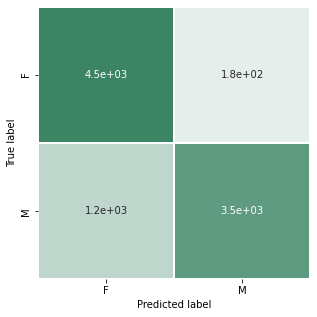

In [55]:
plt.figure(figsize = (6, 5))
c_matrix = confusion_matrix(test_labels, predictions)
c_map = sns.diverging_palette(220, 150, as_cmap = True)
sns.heatmap(c_matrix, center = 0, xticklabels=['F', 'M'], yticklabels=['F', 'M'], cmap=c_map, annot= True, square = True, linewidths= 0.5, cbar=False)
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.savefig('./plots/cf-matrix.jpg', dpi=2400)

In [48]:
from joblib import dump, load
dump(mclf, './model/nb-classifier.joblib')

['./model/nb-classifier.joblib']